In [ ]:
#Data Pre-Processing - Imports Necessary Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

In [ ]:
project_df = pd.read_csv('glassdoor_reviews.csv')
project_df.head()

,Unnamed: 0,column_label,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,...,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons,use
0,1,1,Sotheby-s,2021-05-25,Financial Analyst,"Former Employee, more than 1 year","New York, NY",1,1.0,1.0,...,1.0,2.0,1.0,x,r,x,Don't do it,People in leadership roles have been there for...,Pressure to do whatever the leaders want\r\nNo...,NaN
1,2,1,Sotheby-s,2021-05-25,Administrator,Former Employee,Hong Kong,4,4.0,5.0,...,3.0,4.0,4.0,o,o,o,international auction house,"great exposure, respectful environment and bea...",OT during peak seasons and often underpaid,NaN
2,3,1,Sotheby-s,2021-05-24,Client Services Representative,"Former Employee, more than 1 year","London, England, England",4,5.0,4.0,...,5.0,4.0,5.0,v,v,v,"Fast-paced, difficult and rewarding","Good team, support and training",High-stress with relatively low conpensation,NaN
3,4,1,Sotheby-s,2021-05-22,Anonymous Employee,Current Employee,Hong Kong,3,2.0,2.0,...,3.0,2.0,3.0,o,o,o,Review,"Exposure to artworks, great team of specialists","Work life balance, company culture",NaN
4,5,1,Sotheby-s,2021-05-15,Administrator,"Current Employee, less than 1 year","London, England, England",4,4.0,4.0,...,3.0,3.0,3.0,v,r,v,Fun job and nice people but huge workload and ...,"Fantastic art, nice enthusiastic people and a ...",Very low pay and huge workload,NaN


In [ ]:
#Reorders the columns so the label is in the last column  
new_col_order = [col for col in project_df.columns if col != 'overall_rating'] + ['overall_rating']
project_df = project_df[new_col_order]
project_df.head()

,Unnamed: 0,column_label,firm,date_review,job_title,current,location,work_life_balance,culture_values,diversity_inclusion,...,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons,use,overall_rating
0,1,1,Sotheby-s,2021-05-25,Financial Analyst,"Former Employee, more than 1 year","New York, NY",1.0,1.0,1.0,...,2.0,1.0,x,r,x,Don't do it,People in leadership roles have been there for...,Pressure to do whatever the leaders want\r\nNo...,NaN,1
1,2,1,Sotheby-s,2021-05-25,Administrator,Former Employee,Hong Kong,4.0,5.0,4.0,...,4.0,4.0,o,o,o,international auction house,"great exposure, respectful environment and bea...",OT during peak seasons and often underpaid,NaN,4
2,3,1,Sotheby-s,2021-05-24,Client Services Representative,"Former Employee, more than 1 year","London, England, England",5.0,4.0,4.0,...,4.0,5.0,v,v,v,"Fast-paced, difficult and rewarding","Good team, support and training",High-stress with relatively low conpensation,NaN,4
3,4,1,Sotheby-s,2021-05-22,Anonymous Employee,Current Employee,Hong Kong,2.0,2.0,3.0,...,2.0,3.0,o,o,o,Review,"Exposure to artworks, great team of specialists","Work life balance, company culture",NaN,3
4,5,1,Sotheby-s,2021-05-15,Administrator,"Current Employee, less than 1 year","London, England, England",4.0,4.0,3.0,...,3.0,3.0,v,r,v,Fun job and nice people but huge workload and ...,"Fantastic art, nice enthusiastic people and a ...",Very low pay and huge workload,NaN,4


In [ ]:
project_df = pd.read_csv('glassdoor_reviews.csv')
y = project_df.overall_rating
#Drops the label for processing/feature engineering 
project_df.drop(['overall_rating'], axis=1, inplace=True)

In [ ]:
#Finding the Missing Data
project_df_na = (project_df.isnull().sum() / len(project_df)) * 100
project_df_na = project_df_na.drop(project_df_na[project_df_na == 0].index).sort_values(ascending=False)[:30]
project_missing_data = pd.DataFrame({'Missing Ratio' :project_df_na})
project_missing_data.head(20)

,Missing Ratio
use,100.000000
diversity_inclusion,83.773967
location,35.457913
culture_values,22.821459
senior_mgmt,18.588400
comp_benefits,17.897458
work_life_balance,17.875039
career_opp,17.589671
headline,0.264618
cons,0.000954


In [ ]:
#Imputes missing values with the median value for continuous features
#Imputes missing values with None for categorical features
#Deletes columns with high percentages of missing values 

In [ ]:
del project_df["use"]

In [ ]:
del project_df["diversity_inclusion"]

In [ ]:
project_df["location"] = project_df["location"].fillna("None")

In [ ]:
project_df["culture_values"].fillna(project_df["culture_values"].median(), inplace=True)

In [ ]:
project_df["senior_mgmt"].fillna(project_df["senior_mgmt"].median(), inplace=True)

In [ ]:
project_df["comp_benefits"].fillna(project_df["comp_benefits"].median(), inplace=True)

In [ ]:
project_df["work_life_balance"].fillna(project_df["work_life_balance"].median(), inplace=True)

In [ ]:
project_df["career_opp"].fillna(project_df["career_opp"].median(), inplace=True)

In [ ]:
project_df["headline"] = project_df["headline"].fillna("None")

In [ ]:
project_df["cons"] = project_df["cons"].fillna("None")

In [ ]:
#Checks if there is still any missing data 
project_df_na = (project_df.isnull().sum() / len(project_df)) * 100
project_df_na = project_df_na.drop(project_df_na[project_df_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :project_df_na})
missing_data.head()

,Missing Ratio


In [ ]:
#Data Preprocessing - Featur Engineering 

#Turns recommend, CEO approval, and outlok into numerical features as shown below 
# recommend, ceo_approval, outlook: v: 3, r: 2, o: 1, x: 0
temp_dict = {'v': 3.0, 'r': 2.0, 'o': 1.0, 'x': 0.0}
temp_dict3 = {'v': 2.0, 'o': 1.0, 'x': 0.0}

rec_numeric = []
ceo_approv_numeric = []
outlook_numeric = []

for row in project_df.iterrows():
  rec_numeric.append(temp_dict3[row[1]['recommend']])  
  ceo_approv_numeric.append(temp_dict[row[1]['ceo_approv']])  
  outlook_numeric.append(temp_dict[row[1]['outlook']])  



project_df['recommend_numeric'] = rec_numeric
project_df['ceo_approv_numeric'] = ceo_approv_numeric
project_df['outlook_numeric'] = outlook_numeric

In [ ]:
project_df

,Unnamed: 0,column_label,firm,date_review,job_title,current,location,work_life_balance,culture_values,career_opp,...,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons,recommend_numeric,ceo_approv_numeric,outlook_numeric
0,1,1,Sotheby-s,2021-05-25,Financial Analyst,"Former Employee, more than 1 year","New York, NY",1.0,1.0,1.0,...,1.0,x,r,x,Don't do it,People in leadership roles have been there for...,Pressure to do whatever the leaders want\r\nNo...,0.0,2.0,0.0
1,2,1,Sotheby-s,2021-05-25,Administrator,Former Employee,Hong Kong,4.0,5.0,3.0,...,4.0,o,o,o,international auction house,"great exposure, respectful environment and bea...",OT during peak seasons and often underpaid,1.0,1.0,1.0
2,3,1,Sotheby-s,2021-05-24,Client Services Representative,"Former Employee, more than 1 year","London, England, England",5.0,4.0,5.0,...,5.0,v,v,v,"Fast-paced, difficult and rewarding","Good team, support and training",High-stress with relatively low conpensation,2.0,3.0,3.0
3,4,1,Sotheby-s,2021-05-22,Anonymous Employee,Current Employee,Hong Kong,2.0,2.0,3.0,...,3.0,o,o,o,Review,"Exposure to artworks, great team of specialists","Work life balance, company culture",1.0,1.0,1.0
4,5,1,Sotheby-s,2021-05-15,Administrator,"Current Employee, less than 1 year","London, England, England",4.0,4.0,3.0,...,3.0,v,r,v,Fun job and nice people but huge workload and ...,"Fantastic art, nice enthusiastic people and a ...",Very low pay and huge workload,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838561,838562,71,Department-for-Work-And-Pensions,2010-09-03,Analyst,Former Employee,"London, England, England",4.0,4.0,2.0,...,3.0,o,v,o,DWP Analyst Position,Workforce consists of highly motivated and int...,Often too relaxed and many lack much drive on ...,1.0,3.0,1.0
838562,838563,71,Department-for-Work-And-Pensions,2010-04-25,Assistant Economist,Current Employee,"London, England, England",5.0,4.0,5.0,...,2.0,o,r,o,Stress free job with very strong work life bal...,Only 36 hours a week.\r\nLots of opportunities...,Pay is OK at first but with little growth or b...,1.0,2.0,1.0
838563,838564,71,Department-for-Work-And-Pensions,2009-11-08,Private Secretary,Current Employee,"London, England, England",4.0,4.0,4.0,...,3.0,v,v,o,Inner workings - interesting,"Big department, with lots of opportunities to ...",Long hours tend to be unrewarded when they hap...,2.0,3.0,1.0
838564,838565,71,Department-for-Work-And-Pensions,2009-07-16,DASO Jobcentre,Current Employee,"Newport, Newport, Wales, Wales",5.0,4.0,3.0,...,2.0,v,x,o,Band B - AO,Safe place to work when in recession. People ...,90% of the time its only a very short contract...,2.0,0.0,1.0


In [ ]:
#Feature Selection 
X = project_df[['work_life_balance', 'culture_values', 'career_opp',
                'comp_benefits', 'senior_mgmt', 'ceo_approv_numeric', 'recommend_numeric', 'outlook_numeric']]

In [ ]:
y

0         1
1         4
2         4
3         3
4         4
         ..
838561    2
838562    3
838563    4
838564    4
838565    2
Name: overall_rating, Length: 838566, dtype: int64

In [ ]:
#senior_mgmt has strong correlations with ceo_approval and culture_values, so we will remove it as a feature
X.drop(['senior_mgmt'], axis=1, inplace=True)

/var/folders/hm/r4w78y_j2gx6lqf698vt1ry80000gn/T/ipykernel_83024/2812719940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['senior_mgmt'], axis=1, inplace=True)


In [ ]:
y = y - 1

In [ ]:
y.describe()

count    838566.000000
mean          2.655956
std           1.174684
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           4.000000
Name: overall_rating, dtype: float64

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
modeling_feature_normalizer = StandardScaler()
X_train_normalized = modeling_feature_normalizer.fit_transform(X_train)

In [ ]:
from sklearn.svm import SVC
svm_classification = SVC(kernel = 'linear')
svm_classification.fit(X_train_normalized, y_train)

SVC(kernel='linear')

In [ ]:
#F1 Score and Accuracy Score for SVM
X_test_normalized = modeling_feature_normalizer.fit_transform(X_test)
svm_pred = svm_classification.predict(X_test_normalized)
svm_train_pred = svm_classification.predict(X_train_normalized)

print('Training Accuracy Score: ', accuracy_score(y_train, svm_train_pred))
print('Training F1 Score: ', f1_score(y_train, svm_train_pred, average='weighted'))


print('Testing Accuracy Score: ', accuracy_score(y_test, svm_pred))
print('Testing F1 Score: ', f1_score(y_test, svm_pred, average='weighted'))

Training Accuracy Score:  0.5831539594426193
Training F1 Score:  0.5766019706305674
Testing Accuracy Score:  0.5831057633829019
Testing F1 Score:  0.5765439561495599


In [ ]:
#Feature Importances
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

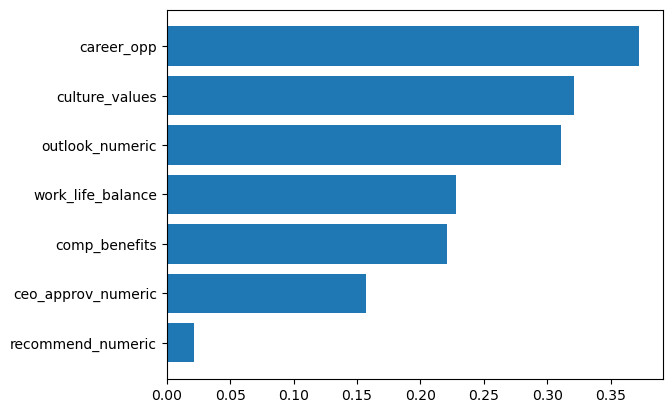

In [ ]:
#Plotting Feature Importance 
feature_names = X_train.columns
f_importances(abs(svm_classification.coef_[0]), feature_names)

In [ ]:
#Cross Validation to find the ideal number of neighbors
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
k_list = list(range(1,51))
cv_scores = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_normalized, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    print(k)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [ ]:
MSE = [1-x for x in cv_scores]
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 50.


In [ ]:
#Model with the Optimized Number of Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn_classification = KNeighborsClassifier(n_neighbors = 50)
knn_classification.fit(X_train_normalized, y_train)

KNeighborsClassifier(n_neighbors=50)

In [ ]:
X_test_normalized = modeling_feature_normalizer.fit_transform(X_test)
knn_pred = knn_classification.predict(X_test_normalized)
knn_train_pred = knn_classification.predict(X_train_normalized)

print('Training Accuracy Score: ', accuracy_score(y_train, knn_train_pred))
print('Training F1 Score: ', f1_score(y_train, knn_train_pred, average='weighted'))


print('Testing Accuracy Score: ', accuracy_score(y_test, knn_pred))
print('Testing F1 Score: ', f1_score(y_test, knn_pred, average='weighted'))

Training Accuracy Score:  0.6048278905034196
Training F1 Score:  0.6039663722201419
Testing Accuracy Score:  0.5971475249531941
Testing F1 Score:  0.5961298436690043


<Figure size 640x480 with 0 Axes>

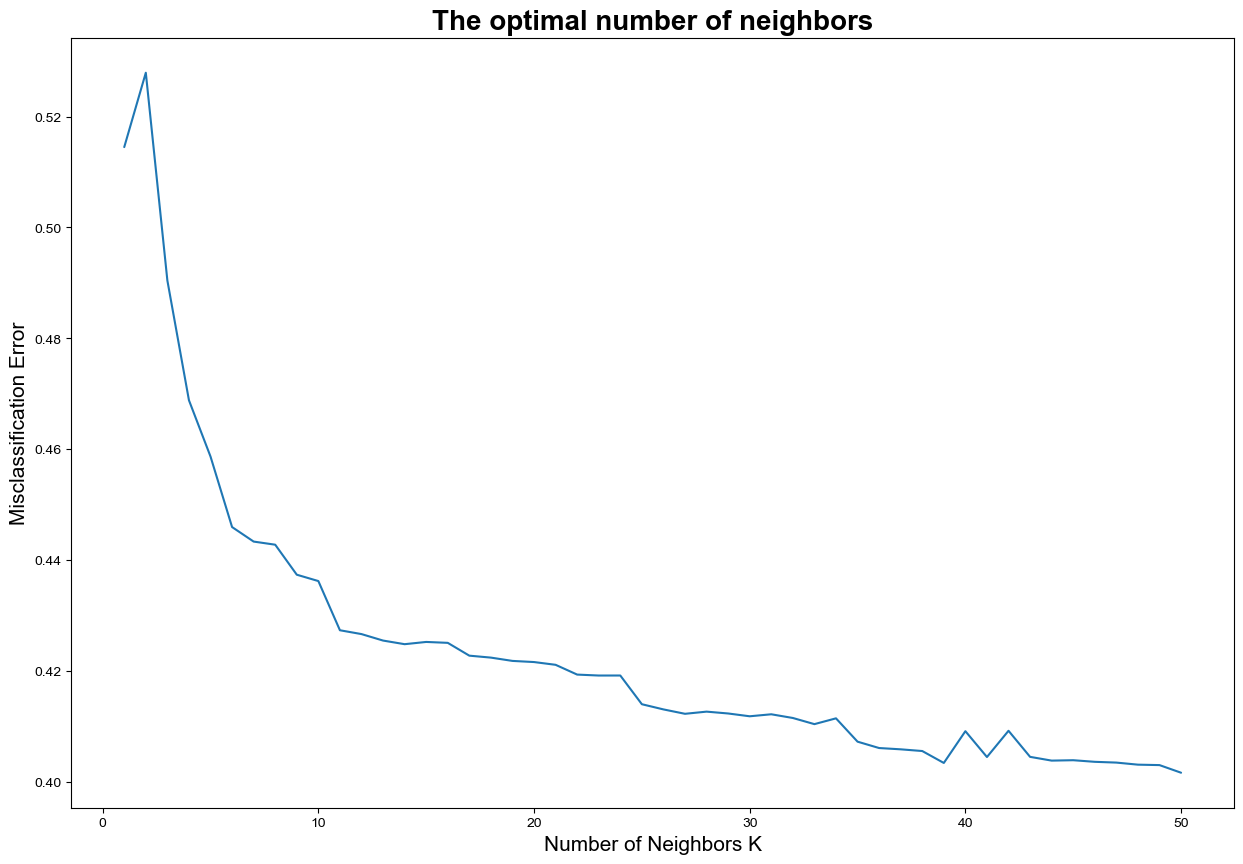

In [ ]:
#Plotting the Error vs Number of Neighbors
import seaborn as sns

# changing to misclassification error
MSE = [1-x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [ ]:
#Random Forest Model 
import mglearn
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Generates an array of all tree values to iterate through 
num_trees = np.arange(2, 22, 2)
oob_accuracy = []
#Iterates through the possible number of trees to store their error 
for idx in range (0, len(num_trees)):
    classifier = RandomForestClassifier(n_estimators = num_trees[idx],
                                       random_state = 2, oob_score = True)
    classifier.fit(X_train_normalized, y_train)
    oob_accuracy.append(classifier.oob_score_)

/Users/suchirmisra/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/suchirmisra/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/suchirmisra/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/suchirmisra/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/suchirmisra/opt/anaconda3/lib/python3.9/site-packages/skl

Text(0, 0.5, 'OOB Accuracy')

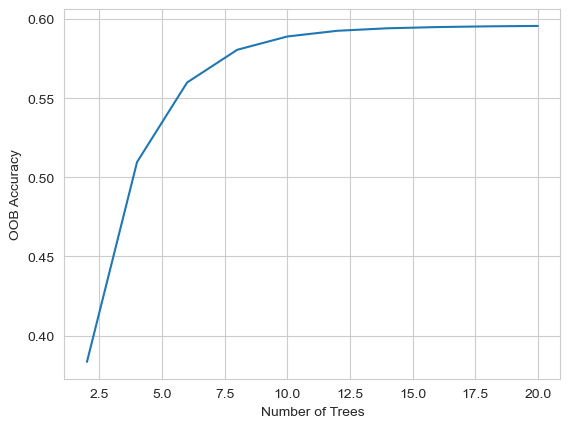

In [ ]:
plt.plot(num_trees, oob_accuracy)
plt.xlabel("Number of Trees")
plt.ylabel("OOB Accuracy")

In [ ]:
#Displaying the Raw Data 
oob_accuracy

[0.3833483391269609,
 0.509648924054784,
 0.559968517646217,
 0.5806064526900121,
 0.589015162807892,
 0.5926150626367663,
 0.594190670967665,
 0.5949658046782301,
 0.5954159784870583,
 0.5956842940022539]

In [ ]:
#Finding best hyperparameters using GridSearchCV
from sklearn.model_selection import GridSearchCV
n_trees = np.arange(10, 21, 1)
split_samples = [1, 2, 3, 4, 5]
leaf_samples = [1, 2, 3, 4, 5]
new_random_forest = RandomForestClassifier()
hyperparameters = {'n_estimators': n_trees, 'min_samples_split': split_samples, "min_samples_leaf": leaf_samples}
new_hyperparams = GridSearchCV(new_random_forest, hyperparameters)
new_hyperparams.fit(X_train_normalized, y_train)

/Users/suchirmisra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
275 fits failed out of a total of 1375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
275 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/suchirmisra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/suchirmisra/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Users/suchirmisra/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatc

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])})

In [ ]:
#Gets the best parameters
new_hyperparams.best_params_

{'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 20}

In [ ]:
#Random Forest Model using Hyperparameters
from sklearn.metrics import accuracy_score
forest = RandomForestClassifier(n_estimators = 20, min_samples_leaf = 5, min_samples_split = 2, random_state = 2) 
forest.fit(X_train_normalized, y_train)

RandomForestClassifier(min_samples_leaf=5, n_estimators=20, random_state=2)

In [ ]:
X_test_normalized = modeling_feature_normalizer.fit_transform(X_test)
randomforest_pred = forest.predict(X_test_normalized)
randomforest_train_pred = forest.predict(X_train_normalized)

print('Training Accuracy Score: ', accuracy_score(y_train, randomforest_train_pred))
print('Training F1 Score: ', f1_score(y_train, randomforest_train_pred, average='weighted'))


print('Testing Accuracy Score: ', accuracy_score(y_test, randomforest_pred))
print('Testing F1 Score: ', f1_score(y_test, randomforest_pred, average='weighted'))

Training Accuracy Score:  0.613797081919708
Training F1 Score:  0.6127109358561708
Testing Accuracy Score:  0.5996875633518967
Testing F1 Score:  0.5981475014264542


(-1.0, 7.0)

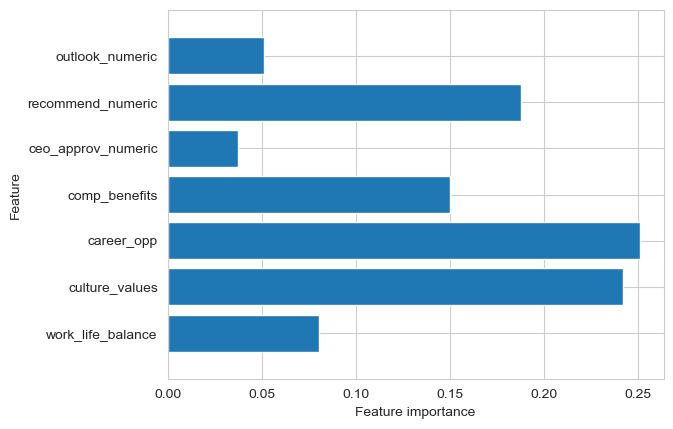

In [ ]:
#Feature Importance
n_features = X.shape[1]
plt.barh(np.arange(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

In [ ]:
print("Complete")